# Ex 4.10  Tasks 6-9

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Setting the path
path=r'C:\Users\jecka\2023-09-11 Achievement 4 Python'

In [3]:
# getting df file
insta_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final.pkl'))

In [4]:
insta_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   gender                 object  
 2   state                  object  
 3   age                    int64   
 4   date_joined            object  
 5   number_of_dependents   int64   
 6   marital_status         object  
 7   income                 int64   
 8   order_id               int64   
 9   eval_set               object  
 10  order_number           int64   
 11  orders_day_of_week     int64   
 12  order_hour_of_day      int64   
 13  days_since_last_order  float64 
 14  product_id             float64 
 15  add_to_cart_order      float64 
 16  reordered              float64 
 17  product_name           object  
 18  aisle_id               int64   
 19  department_id          int64   
 20  prices                 float64 
 21  _merge                 catego

In [5]:
insta_final['order_act'].value_counts()

order_act
high_activity    30964564
low_activity      1440295
Name: count, dtype: int64

## Part 6 Visulizations

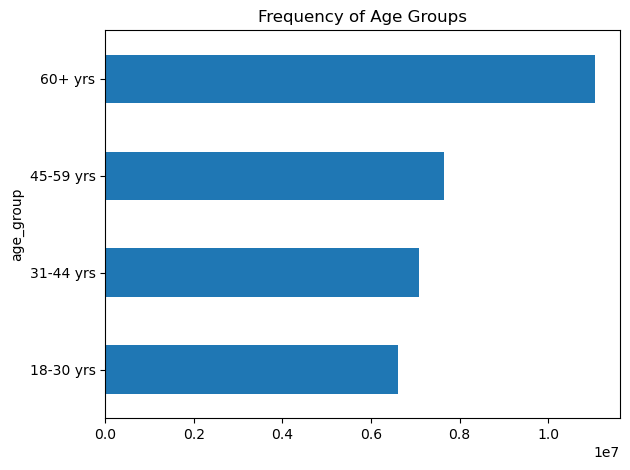

In [6]:
# Bar chart for age groups
bar_age_group = insta_final['age_group'].value_counts().sort_index().plot.barh()
plt.title('Frequency of Age Groups')
plt.tight_layout()

In [10]:
# Exporting bar chart.
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_groups.png'))

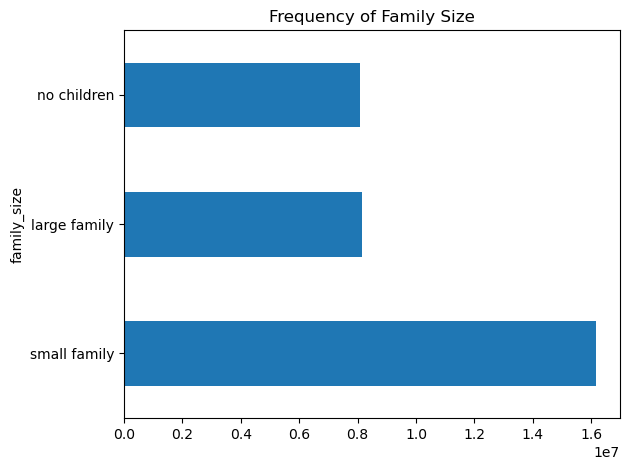

In [8]:
# Creating a bar chart for 'customer_profile'
bar_family = insta_final['family_size'].value_counts().plot.barh(title = 'Frequency of Family Size')
plt.tight_layout()

In [11]:
# Exorting
bar_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family.png'))

## Step 7 Aggregate Frequency of Usage and Expenditure

In [12]:
#Aggregate Ages
age_aggregate = insta_final.groupby('age_group').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [13]:
age_aggregate

order_number             prices              
                  mean min max       mean  min      max
age_group                                              
18-30 yrs    17.041421   1  99  12.059656  1.0  99999.0
31-44 yrs    17.247753   1  99  11.839623  1.0  99999.0
45-59 yrs    17.169911   1  99  12.355924  1.0  99999.0
60+ yrs      17.115825   1  99  11.763336  1.0  99999.0

In [14]:
# Aggregate income
income_aggregate = insta_final.groupby('income_group',)[['days_since_last_order','prices']].agg(['min','max','mean'])

In [15]:
income_aggregate

days_since_last_order                  prices           \
                                min   max       mean    min      max   
income_group                                                           
high income                     0.0  30.0  10.199644    1.0  99999.0   
low income                      0.0  30.0  11.524660    1.0     25.0   
medium income                   0.0  30.0  11.040638    1.0  99999.0   

                           
                     mean  
income_group               
high income    264.709601  
low income       6.904099  
medium income   10.474908

In [16]:
# Aggregate Family Size/Dependants
family_aggregate =  insta_final.groupby('family_size').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [17]:
family_aggregate

order_number             prices              
                     mean min max       mean  min      max
family_size                                               
large family    17.143361   1  99  11.793264  1.0  99999.0
no children     17.264622   1  99  12.129243  1.0  99999.0
small family    17.080529   1  99  11.999659  1.0  99999.0

In [18]:
# Aggregate Department
depart_aggregate = insta_final.groupby('department').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

In [19]:
depart_aggregate

order_number             prices              
                        mean min max       mean  min      max
department                                                   
alcohol            15.215751   1  99   8.143701  1.0     15.0
babies             19.310397   1  99   7.638380  1.0     15.0
bakery             17.170395   1  99   7.853809  1.0     15.0
beverages          17.225802   1  99   7.680502  1.0     15.0
breakfast          16.773669   1  99   8.028963  1.0     14.9
bulk               20.197148   1  99   8.348960  1.4     14.1
canned goods       16.165037   1  99   7.539976  1.0     15.0
dairy eggs         17.665606   1  99  33.479533  1.0  99999.0
deli               16.473447   1  99   7.778701  1.0     15.0
dry goods pasta    15.895474   1  99   7.350283  1.0     15.0
frozen             15.457838   1  99   7.736553  1.0     15.0
household          15.694469   1  99   7.384058  1.0     15.0
international      16.439806   1  99   7.682264  1.0     15.0
meat seafood       15.887671   1  99  16.294443  8.0     25.0
missing            22.902379   1  99   8.660716  1.0     15.0
other              17.277920   1  99   6.990934  1.1     15.0
pantry             16.583536   1  99   8.009443  1.0     20.0
personal care      16.170638   1  99   7.996769  1.0     15.0
pets               15.340650   1  99   7.889070  1.0     15.0
produce            17.811403   1  99   7.981708  1.0     15.0
snacks             17.177343   1  99   4.275437  1.6      7.0

## Task 8 Compare customer profiles to region and department
## and Task 9 Produce suitable charts

In [20]:
# Creating Crosstab for family and region
age_by_region = pd.crosstab(insta_final['region'],insta_final['age_group'], dropna = False)

In [21]:
age_by_region

age_group,18-30 yrs,31-44 yrs,45-59 yrs,60+ yrs
region,,,,
Midwest,1530291,1684009,1813487,2569538
Northeast,1161641,1228327,1359665,1973103
South,2226861,2386675,2492766,3685583
West,1680566,1791714,1981602,2839031


Text(0.5, 1.0, 'Age in Each U.S. Region')

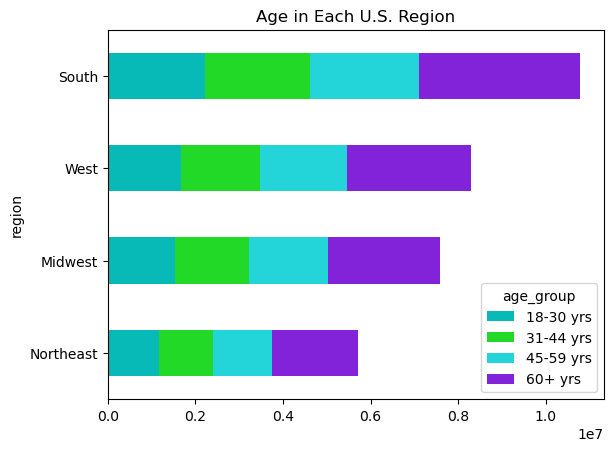

In [22]:
age_region_sort = age_by_region.sort_values(by= '18-30 yrs', ascending=True)
bar_age_region = age_region_sort.plot.barh(color=['#08bab7', '#23d928', '#23d4d9', '#8323d9'],stacked=True)
plt.title("Age in Each U.S. Region")

In [23]:
# exporting to PNG
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [24]:
income_by_region = pd.crosstab(insta_final['region'],insta_final['income_group'], dropna = False)

In [25]:
income_by_region

income_group,high income,low income,medium income
region,,,
Midwest,65297,1093626,6438402
Northeast,41127,839691,4841918
South,84846,1605216,9101823
West,67173,1201452,7024288


Text(0.5, 1.0, 'Income Group by U.S. Region')

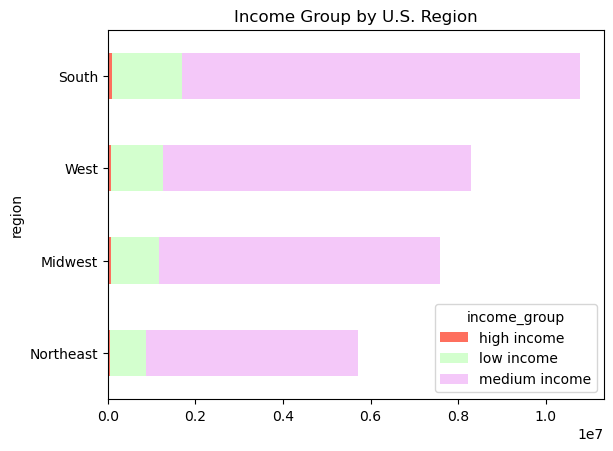

In [26]:
income_region_sort= income_by_region.sort_values(by= 'medium income', ascending=True)
bar_region_income = income_region_sort.plot.barh(stacked=True, color=['#fe6f5e', '#d3ffce', '#f4c8f9'])
plt.title("Income Group by U.S. Region", fontsize=12)

In [27]:
# exporting to PNG
bar_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

In [28]:
# Creating Crosstab for family sizes by region
depend_by_region = pd.crosstab(insta_final['region'],insta_final['family_size'], dropna = False)

In [29]:
depend_by_region

family_size,large family,no children,small family
region,,,
Midwest,1874667,1905200,3817458
Northeast,1445080,1418301,2859355
South,2706538,2701659,5383688
West,2108824,2072343,4111746


Text(0.5, 1.0, 'Family size by U.S. Region')

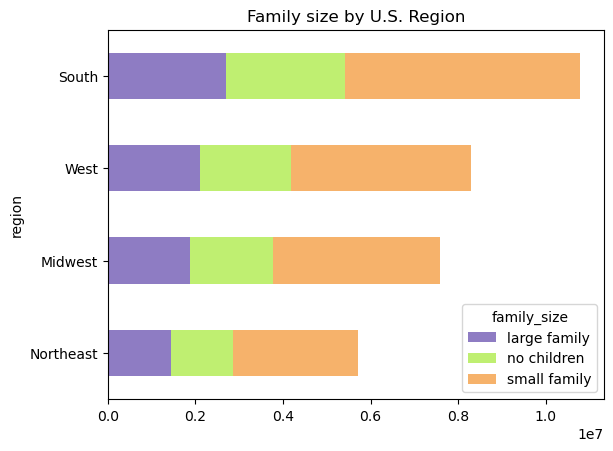

In [30]:
depend_region_sort= depend_by_region.sort_values(by= 'small family', ascending=True)
depend_by_region_bar = depend_region_sort.plot.barh(stacked=True, color=['#8e7cc3', '#bfef71', '#f6b26b'])
plt.title("Family size by U.S. Region", fontsize=12)

In [31]:
#Export to PNG
depend_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_dependant.png'))

In [32]:
# Making a crosstab for income according to age
income_age=pd.crosstab(insta_final['income_group'], insta_final['age_group'], dropna = False)

In [33]:
income_age

age_group,18-30 yrs,31-44 yrs,45-59 yrs,60+ yrs
income_group,,,,
high income,21367,43189,82538,111349
low income,1515980,1348009,773227,1102769
medium income,5062012,5699527,6791755,9853137


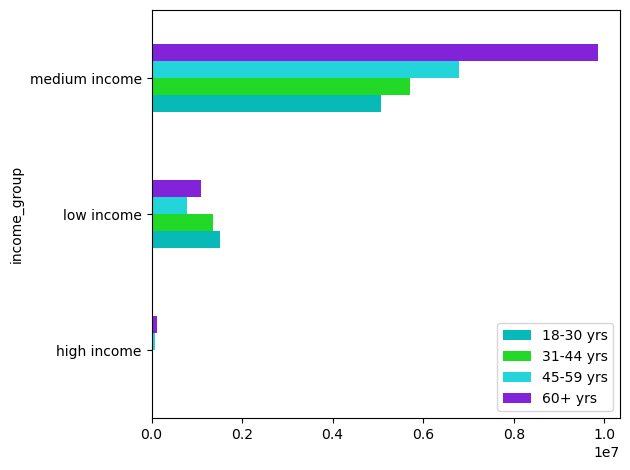

In [34]:
# Creating a bar chart
# I used hex codes on this one
income_age_bar=income_age.plot.barh(color=['#08bab7', '#23d928', '#23d4d9', '#8323d9'])
plt.legend(loc='lower right')
plt.tight_layout()

In [35]:
# Export bar chart to png
income_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_age.png'))

In [36]:
# Making a crosstab for marital status with age
age_status=pd.crosstab(insta_final['marital_status'], insta_final['age_group'], dropna = False)

In [37]:
age_status

age_group,18-30 yrs,31-44 yrs,45-59 yrs,60+ yrs
marital_status,,,,
divorced/widowed,0,0,0,2771812
living with parents and siblings,1550603,0,0,0
married,3404467,5320563,5736280,8295443
single,1644289,1770162,1911240,0


In [38]:
# Making a crosstab for family age
age_family=pd.crosstab(insta_final['family_size'], insta_final['age_group'], dropna = False)

In [39]:
age_family

age_group,18-30 yrs,31-44 yrs,45-59 yrs,60+ yrs
family_size,,,,
large family,1665610,1757529,1929581,2782389
no children,1644289,1770162,1911240,2771812
small family,3289460,3563034,3806699,5513054


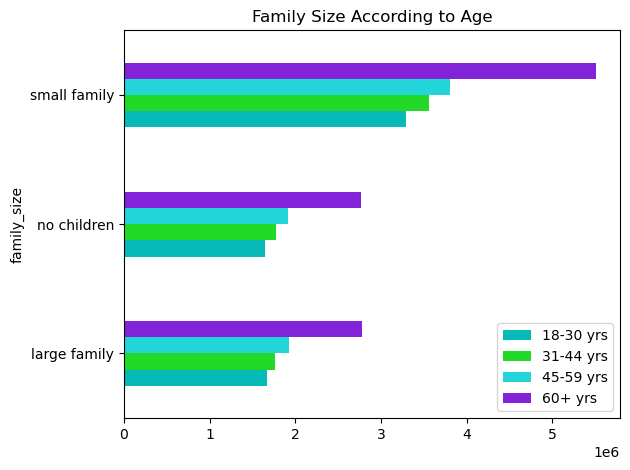

In [40]:
# Creating a bar chart
# I used hex codes on this one
age_family_bar=age_family.plot.barh(color=['#08bab7', '#23d928', '#23d4d9', '#8323d9'])
plt.title('Family Size According to Age')
plt.legend(loc='lower right')
plt.tight_layout()

In [41]:
# Export bar chart to png
age_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_family.png'))

In [42]:
insta_final['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [43]:
purch_income=pd.crosstab(insta_final['department'], insta_final['income_group'], dropna = False)

In [44]:
purch_income

income_group,high income,low income,medium income
department,,,
alcohol,6200,24324,123172
babies,2150,45598,376054
bakery,12795,154056,1005577
beverages,24958,506792,2156373
breakfast,6621,123852,572560
bulk,27,6226,28320
canned goods,9292,122799,935967
dairy eggs,45022,721677,4632048
deli,7421,151289,892539


In [45]:
# Narrowing the income group to only medium income 
medium_items = purch_income[['medium income']]

In [46]:
medium_items

income_group,medium income
department,
alcohol,123172
babies,376054
bakery,1005577
beverages,2156373
breakfast,572560
bulk,28320
canned goods,935967
dairy eggs,4632048
deli,892539


In [ ]:
# Extracting data for the pie chart
departments = medium_items.index
counts = medium_items['medium income']

# Plotting the pie chart for the specific income group
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=departments, autopct='%1.0f%%', startangle=140)
plt.title('Pie Chart for Medium Income Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

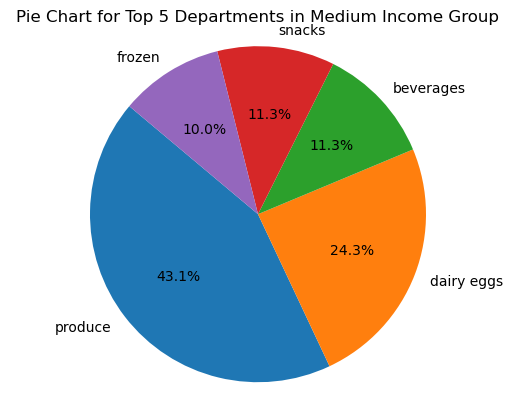

In [48]:
sorted_medium_items = medium_items.sort_values(by='medium income', ascending=False).head(5)

# Extracting data for the pie chart
departments = sorted_medium_items.index
counts = sorted_medium_items['medium income']

# Plotting the pie chart for the top 5 departments in the specific income group
income_items_pie_5 = plt.figure()
plt.pie(counts, labels=departments, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for Top 5 Departments in Medium Income Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [49]:
# Exporting pie chart to PNG
income_items_pie_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_items_top_5.png'))

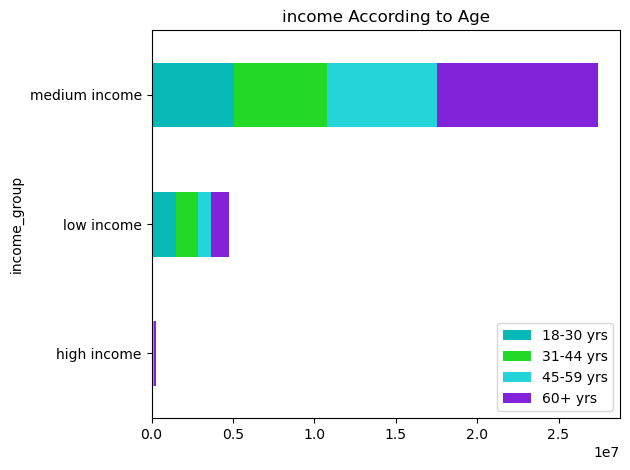

In [50]:
#Going back to the age and income chart and changing the type of chart
# Creating a bar chart
# I used hex codes on this one
income_age_bar=income_age.plot.barh(color=['#08bab7', '#23d928', '#23d4d9', '#8323d9'], stacked = True)
plt.title('income According to Age')
plt.legend(loc='lower right')
plt.tight_layout()

In [51]:
income_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations',  'stacked_income_age.png'))

In [52]:
day_hour_ages = pd.crosstab(insta_final['order_hour_of_day'], insta_final['age_group'], dropna = False)

In [53]:
day_hour_ages

age_group,18-30 yrs,31-44 yrs,45-59 yrs,60+ yrs
order_hour_of_day,,,,
0,45414,50146,50603,72606
1,24036,26225,27345,38094
2,14793,15612,15369,23601
3,10532,11704,11256,17789
4,11123,11161,11725,19233
5,18353,18305,20311,30992
6,61162,63272,67436,98623
7,180903,192258,209706,308187
8,346727,374523,408588,588280


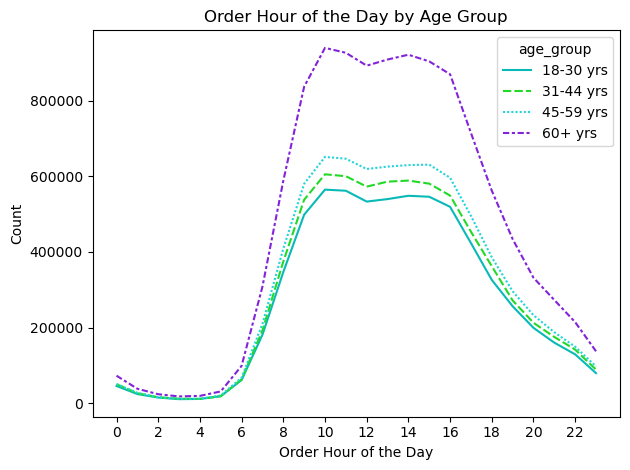

In [54]:
# Custom colors for each age group to match with previous charts
age_group_colors = ['#08bab7', '#23d928', '#23d4d9', '#8323d9']

# Plotting the line graph using Seaborn
plt.figure()
line_hour_age = sns.lineplot(data=day_hour_ages, palette=age_group_colors)
plt.xlabel('Order Hour of the Day')
plt.ylabel('Count')
plt.title('Order Hour of the Day by Age Group')
# Set x-axis ticks at specific hours
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.tight_layout()
plt.show()

In [55]:
line_hour_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations',  'line_hour_age_graph.png'))

In [56]:
# Creating Crosstab for loyalty shopping hours
day_hour_loyal = pd.crosstab(insta_final['order_hour_of_day'], insta_final['loyalty_flag'], dropna = False)

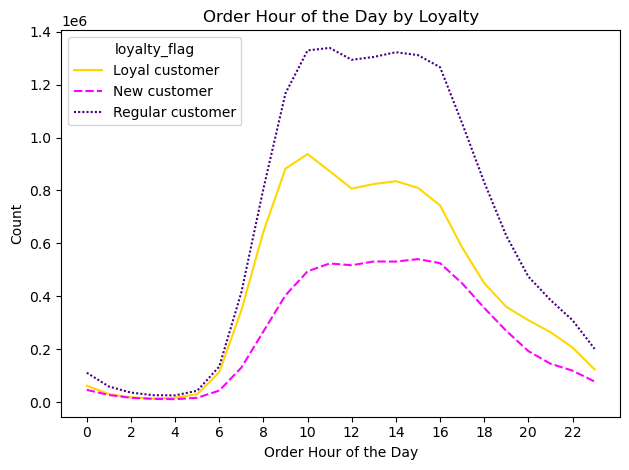

In [57]:
# Custom colors for each age group to match with previous charts
loyalty_colors = ['gold', 'magenta', 'indigo']

# Plotting the line graph using Seaborn
plt.figure()
line_hour_loyal = sns.lineplot(data=day_hour_loyal, palette=loyalty_colors)
plt.xlabel('Order Hour of the Day')
plt.ylabel('Count')
plt.title('Order Hour of the Day by Loyalty')
# Set x-axis ticks at specific hours
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.tight_layout()
plt.show()

In [58]:
# exporting to PNG
line_hour_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations',  'line_graph_hour_loyal.png'))

In [59]:
# Crosstab comparing loyalty customers to department count
department_loyalty = pd.crosstab(insta_final['department'],insta_final['loyalty_flag'], dropna = False)

In [60]:
department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


Text(0.5, 1.0, 'Loyalty by Department')

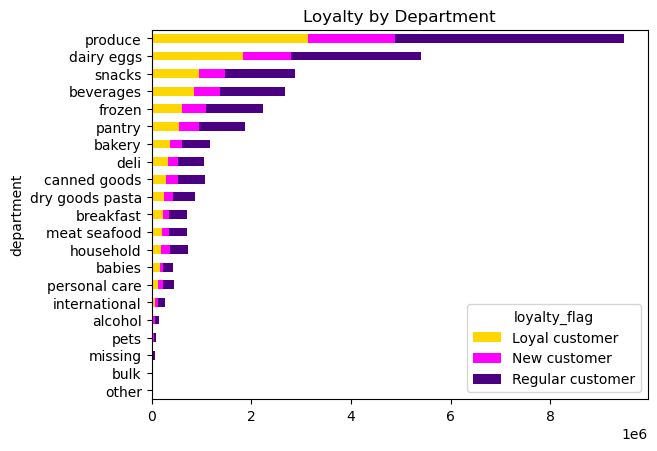

In [61]:
# Sort the data by a specific column in ascending order
department_loyalty_sorted = department_loyalty.sort_values(by= 'Loyal customer', ascending=True)

# Create and display the horizontal bar plot
Depart_loyal_bar = department_loyalty_sorted.plot.barh(color =['gold', 'magenta', 'indigo'],stacked=True)
plt.title("Loyalty by Department")

In [62]:
# Exporting to PNG
Depart_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Bar_depart_loyal.png'))

In [63]:
# Creating Crosstab for loyalty ages
loyalty_age = pd.crosstab(insta_final['age_group'], insta_final['loyalty_flag'], dropna = False)

In [64]:
loyalty_age

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-30 yrs,2058970,1276713,3263676
31-44 yrs,2269656,1354768,3466301
45-59 yrs,2440694,1469783,3737043
60+ yrs,3514773,2142726,5409756


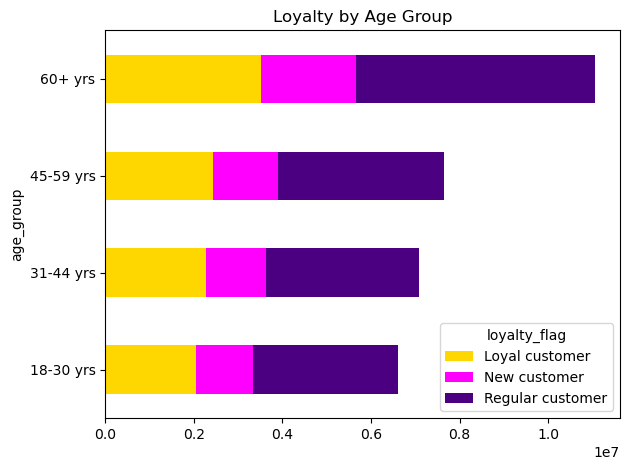

In [66]:
loyal_age_bar = loyalty_age.plot.barh(color =['gold', 'magenta', 'indigo'],stacked=True)
plt.title("Loyalty by Age Group")
plt.tight_layout()

In [67]:
# Exporting to PNG
loyal_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Bar_age_loyal.png'))